### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def StringUDF(x) :
    return str(x).split("-")[2]

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
dfUser = pd.read_csv("user.csv")
dfItem = pd.read_csv("item.csv")
dfData = pd.read_csv("Data (1).csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [4]:
myDf = pd.DataFrame()

In [5]:
myDF = dfUser.copy()
myDF.info()
print ("\nshape")
print (myDF.shape)
print ("\ndescribe")
print(myDF.describe())
print("\nany nulls in these columns?\n", myDF.isnull().any())
print ("\nisnull\n", myDF.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB

shape
(943, 5)

describe
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

any nulls in these columns?
 user id       False
age           False
gender        False
occupation    False
zip code      False
dtype: bool

isnull
      user id    age  gender  occupation  zip code
0      False  False   False       False     False
1      False  Fals

In [6]:
myDF = dfItem.copy()
print (myDF.info())
print ("\nshape")
print (myDF.shape)
print ("\ndescribe")
print(myDF.describe())
print("\nany nulls in these columns?\n", myDF.isnull().any())
print ("\nisnull\n", myDF.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [7]:
myDF = dfData.copy()

myDF.info()
print ("\nshape")
print (myDF.shape)
print ("\ndescribe")
print(myDF.describe())
print("\nany nulls in these columns?\n", myDF.isnull().any())
print ("\nisnull\n", myDF.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

shape
(100000, 4)

describe
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08

any nulls in 

There are no nulls in the data

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [8]:
# use sum on the default axis
dfItem.iloc[:, 3:].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 5 marks

In [9]:
#hint: use sum on the axis = 1

In [10]:
dfTitles = pd.DataFrame()
dfTitles = dfItem['movie title'].copy()
dfGenres = pd.DataFrame()
dfGenres = dfItem.iloc[:, 3:]

In [11]:
dfGenresSum = pd.DataFrame(dfGenres.sum(axis=1), columns = ['GenreSumForMovie'])

In [12]:
dfTitlesAndGenres = pd.DataFrame()
dfTitlesAndGenres = pd.concat([dfTitles, dfGenresSum], axis=1)
groupedMoreThanOneGenre = dfTitlesAndGenres.groupby(['GenreSumForMovie'])

In [13]:
dfTitlesAndGenres[dfTitlesAndGenres['GenreSumForMovie'] > 1]
# there are 849 movies having > 1 Genre, and number of Genres the movie has.

,movie title,GenreSumForMovie
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [14]:
dfItem[dfItem['unknown'] == 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dfItem.drop(1371, axis=0, inplace = True)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [16]:
# HINT: Use distplot for age and countplot for gender,ratings,occupation. Use lineplot or countplot for release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)

In [17]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [18]:
#your answers here

In [19]:
stringYears = pd.Series(dtype=str)

In [20]:
stringYears = dfItem["release date"].apply(StringUDF)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 <a list of 71 Text major ticklabel objects>)

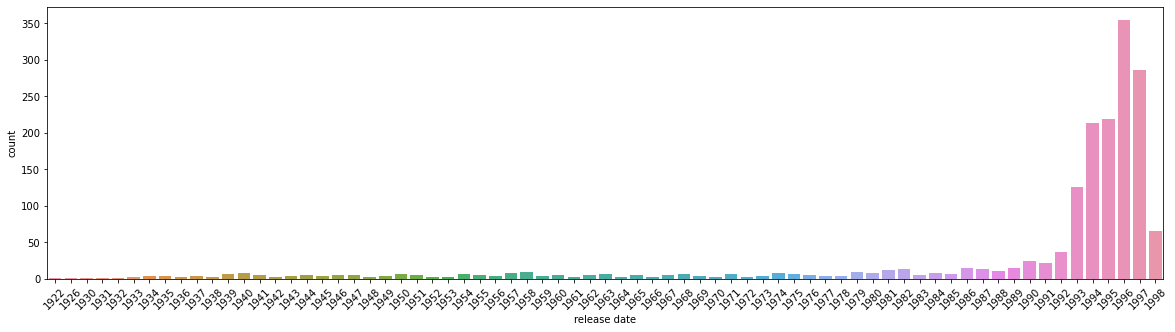

In [21]:
plt.figure(figsize=(20, 5))
sns.countplot(stringYears)
plt.xticks(rotation=45)

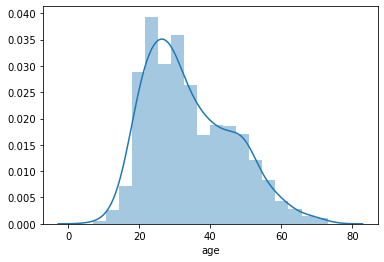

In [22]:
sns.distplot(dfUser["age"])

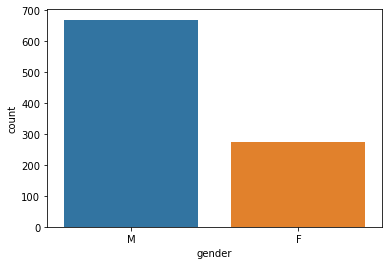

In [23]:
sns.countplot(dfUser['gender'])

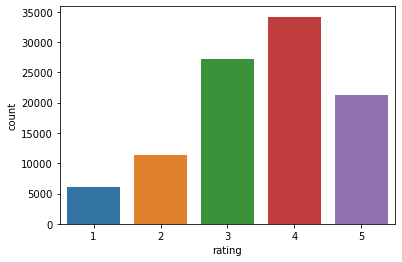

In [24]:
sns.countplot(dfData['rating'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

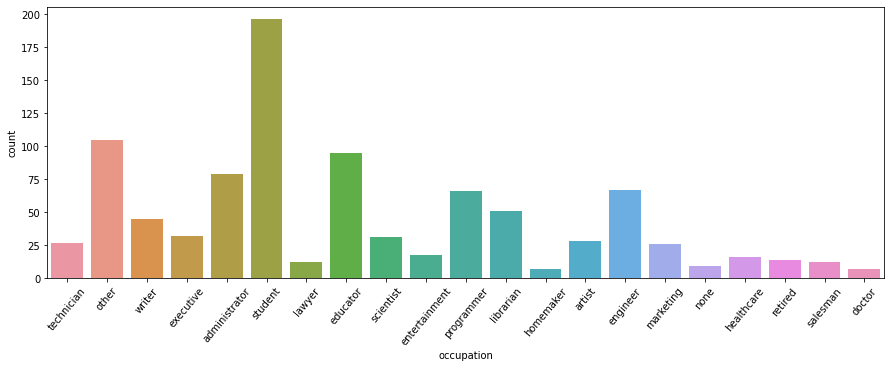

In [25]:
plt.figure(figsize=(15, 5))
sns.countplot(dfUser['occupation'])
plt.xticks(rotation=50)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [26]:
#Your answer here

In [27]:
# create a new df by adding the column stringYears to dfItem.
# then group by stringYears.
# sum each genre for each stringYear.

In [28]:
dfNoReleaseDate = pd.DataFrame()
dfNoReleaseDate = dfItem.drop(columns = 'release date', axis=1)

In [29]:
dfPopularity = pd.DataFrame()

In [30]:
dfPopularity = pd.concat([stringYears, dfNoReleaseDate], axis = 1)

In [31]:
listGenres = dfPopularity.columns
listGenres[4:]

Index(['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [32]:
dfPopularity.groupby("release date")[listGenres[4:]].sum()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release date,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


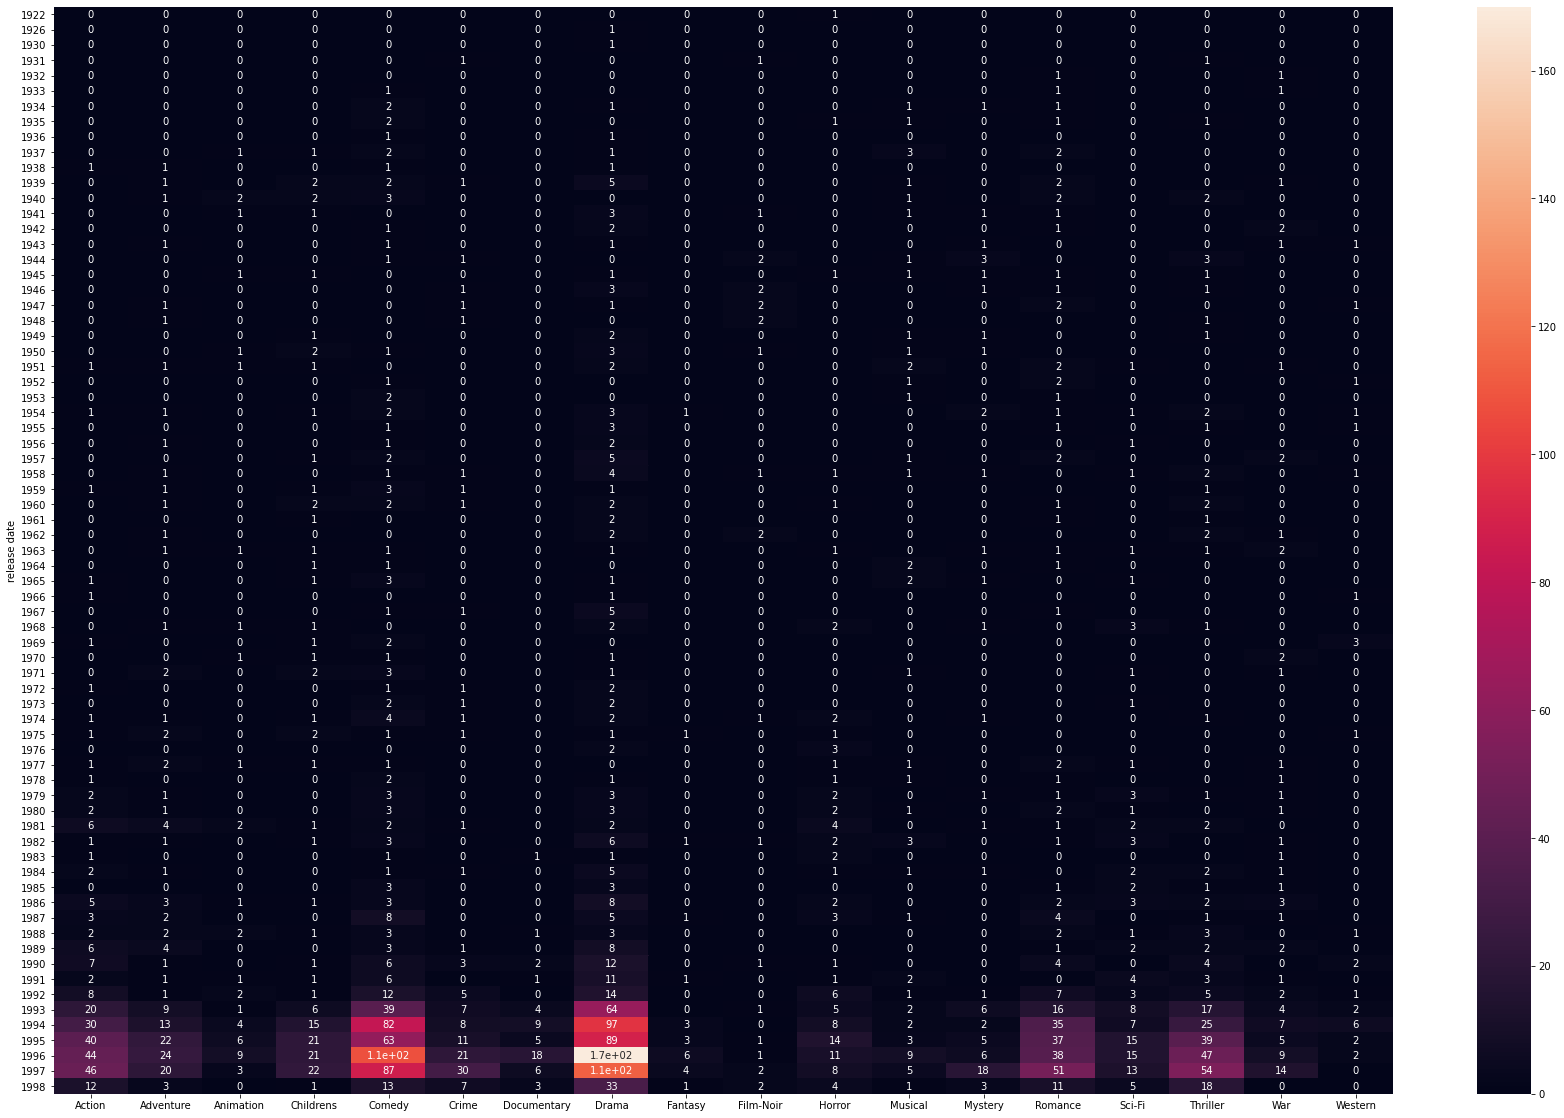

In [33]:
plt.figure(figsize=(30, 20))
sns.heatmap(dfPopularity.groupby("release date")[listGenres[4:]].sum(), annot=True)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. 
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
4. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [34]:
dfDataRatingCountAndSum = pd.DataFrame(columns=['RatingCount', 'RatingSum'])
dfDataRatingCountAndSum = pd.concat([dfData.groupby('movie id')['rating'].count(), dfData.groupby('movie id')['rating'].sum()], axis=1)

In [35]:
dfRatingCount = pd.DataFrame( dfData.groupby('movie id')['rating'].count())
dfRatingSum = pd.DataFrame( dfData.groupby('movie id')['rating'].sum() )
dfRatingSum.rename(columns = {'rating' : 'Rating Sum'}, inplace = True)
dfRatingCount.rename(columns = {'rating' : 'Rating Count'}, inplace = True)

print(dfRatingCount.head())
dfRatingSum.head()

          Rating Count
movie id              
1                  452
2                  131
3                   90
4                  209
5                   86


,Rating Sum
movie id,
1,1753
2,420
3,273
4,742
5,284


In [36]:
dfRatingAverage = pd.concat([dfRatingCount, dfRatingSum], axis = 1)
dfRatingAverage['Average Rating'] = 0
for j in range(len(dfRatingAverage)) :
    dfRatingAverage.iloc[j, 2] = dfRatingAverage.iloc[j, 1] / dfRatingAverage.iloc[j, 0]
dfRatingAverage.head()

,Rating Count,Rating Sum,Average Rating
movie id,,,
1,452,1753,3.878319
2,131,420,3.206107
3,90,273,3.033333
4,209,742,3.550239
5,86,284,3.302326


In [37]:
dfRatingAverage.sort_values([ 'Rating Count'], axis = 0, ascending=False, inplace = True)

In [38]:
dfRatingAverage[dfRatingAverage['Rating Count'] > 100 ].sort_values([ 'Average Rating'], axis = 0, ascending=False).head(25)
# need to use the isin function, and merge function.

,Rating Count,Rating Sum,Average Rating
movie id,,,
408,112,503,4.491071
318,298,1331,4.466443
169,118,527,4.466102
483,243,1083,4.456790
64,283,1258,4.445230
603,209,917,4.387560
12,267,1171,4.385768
50,583,2541,4.358491
178,125,543,4.344000


In [39]:
#your answer here

print ("The top 25 Movie IDs, ranked by ratings, for movies with more than 100 ratings are:\n")
print ( list (dfRatingAverage[dfRatingAverage['Rating Count'] > 100 ].sort_values([ 'Average Rating'], axis = 0, ascending=False).head(25).index ) )

The top 25 Movie IDs, ranked by ratings, for movies with more than 100 ratings are:

[408, 318, 169, 483, 64, 603, 12, 50, 178, 134, 427, 357, 98, 480, 127, 285, 272, 657, 474, 174, 479, 313, 511, 484, 172]


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [40]:
dfWhoRatedWhat3 = pd.DataFrame(columns = ['sex', 'drama', 'sci fi', 'romance'])
dfWhoRatedWhat = pd.concat([dfData[['user id', 'movie id']], dfWhoRatedWhat3], axis = 1)
#myIndex = dfWhoRatedWhat[dfWhoRatedWhat['movie id'] == 267 ].index
#dfWhoRatedWhat.drop(labels = myIndex, axis = 0, inplace=True)

In [41]:
# Get user id, ratings, and gender in a dataframe:
# (there is no movie id = 267 in dfItem)
for k in range(len(dfWhoRatedWhat) ) :
    userID = dfWhoRatedWhat.iloc[k, 0]
    userGender = dfUser.iloc[(userID - 1), 2]
    dfWhoRatedWhat.iloc[k, 2] = userGender
    movieID = dfWhoRatedWhat.iloc[k, 1]  
    if not dfItem[dfItem['movie id'] == movieID]['movie id'].empty :
        isDrama = int ( dfItem[dfItem['movie id'] == movieID]['Drama'])
        isSciFi = int ( dfItem[dfItem['movie id'] == movieID]['Sci-Fi'])
        isRomance = int ( dfItem[dfItem['movie id'] == movieID]['Romance'])
        dfWhoRatedWhat.iloc[k, 3] = isDrama
        dfWhoRatedWhat.iloc[k, 4] = isSciFi
        dfWhoRatedWhat.iloc[k, 5] = isRomance

In [42]:
dfUser['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

#### Conclusion:



In [43]:
#write the conclusions here

# my conclusions are:
# 1) given MovieLens data, a woman is more likely to watch a Drama than a man, and a woman is more likely to watch a Romance than a Man.
# 2) a man is more likely to watch a Sci-Fi than a woman.  
# 3) it should be noted that the number of male user ids is about three times as large as women's,
#    and the number of movie ratings from males is also about three times larger.
#    So, one could argue this group of males does watch more Drama, Sci-Fi, and Romance than this group of females.

In [44]:
print ("sum of Male Drama ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['drama'].sum())
print ("sum of Female Drama ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['drama'].sum())
print ("all Drama ratings", dfWhoRatedWhat['drama'].sum(), "\n")

print ("sum of Male Sci-Fi ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sci fi'].sum())
print ("sum of Female Sci-Fi ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sci fi'].sum())
print ("all Sci-Fi ", dfWhoRatedWhat['drama'].sum(), "\n")

print ("sum of Male Romance ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['romance'].sum())
print ("sum of Female Romance ratings", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['romance'].sum())
print ("all Romance ", dfWhoRatedWhat['drama'].sum(), "\n")

print ("all women ratings all genres", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sex'].value_counts() )
print ("all men ratings all genres", dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sex'].value_counts() )

percentOfWomenWhoWatchDrama = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['drama'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sex'].value_counts() * 100.
percentOfMenWhoWatchDrama = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['drama'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sex'].value_counts() * 100.

percentOfWomenWhoWatchSciFi = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sci fi'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sex'].value_counts() * 100.
percentOfMenWhoWatchSciFi = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sci fi'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sex'].value_counts() * 100.

percentOfWomenWhoWatchRomance = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['romance'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'F']['sex'].value_counts() * 100.
percentOfMenWhoWatchRomance = dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['romance'].sum() / dfWhoRatedWhat[dfWhoRatedWhat['sex'] == 'M']['sex'].value_counts() * 100.

print ("\n", " percentOfWomenWhoWatchDrama ", percentOfWomenWhoWatchDrama)
print ("\n", " percentOfMenWhoWatchDrama ", percentOfMenWhoWatchDrama)
print ("\n", " percentOfWomenWhoWatchSciFi ", percentOfWomenWhoWatchSciFi)
print ("\n", " percentOfMenWhoWatchSciFi ", percentOfMenWhoWatchSciFi)
print ("\n", " percentOfWomenWhoWatchRomance ", percentOfWomenWhoWatchRomance)
print ("\n", " percentOfMenWhoWatchRomance ", percentOfMenWhoWatchRomance)

sum of Male Drama ratings 28887
sum of Female Drama ratings 11008
all Drama ratings 39895 

sum of Male Sci-Fi ratings 10101
sum of Female Sci-Fi ratings 2629
all Sci-Fi  39895 

sum of Male Romance ratings 13603
sum of Female Romance ratings 5858
all Romance  39895 

all women ratings all genres F    25740
Name: sex, dtype: int64
all men ratings all genres M    74260
Name: sex, dtype: int64

  percentOfWomenWhoWatchDrama  F    42.766123
Name: sex, dtype: float64

  percentOfMenWhoWatchDrama  M    38.899811
Name: sex, dtype: float64

  percentOfWomenWhoWatchSciFi  F    10.213675
Name: sex, dtype: float64

  percentOfMenWhoWatchSciFi  M    13.602208
Name: sex, dtype: float64

  percentOfWomenWhoWatchRomance  F    22.758353
Name: sex, dtype: float64

  percentOfMenWhoWatchRomance  M    18.318072
Name: sex, dtype: float64
